In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

# Open the BMP image
bmp_image = Image.open("/content/drive/MyDrive/Breast/benign.bmp")

# Save the BMP image as JPEG
bmp_image.save("/content/drive/MyDrive/Breast/output_benign.jpeg", "JPEG")

In [ ]:
from PIL import Image

# Open the BMP image
bmp_image = Image.open("/content/drive/MyDrive/Breast/maliganent.bmp")

# Save the BMP image as JPEG
bmp_image.save("/content/drive/MyDrive/Breast/output_maliganent.jpeg", "JPEG")

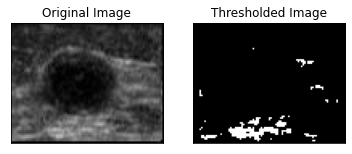

In [ ]:

# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load ultrasound image
img = cv2.imread("/content/drive/MyDrive/Breast/output_benign.jpeg")

# Apply thresholding
ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display original and thresholded images
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.show()

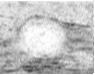

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("/content/drive/MyDrive/Breast/output_benign.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform the bitwise NOT operation
inv = cv2.bitwise_not(gray)

# Show the inverted image
cv2_imshow(inv)

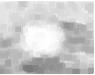

In [ ]:
import cv2
import numpy as np

# Load input image as grayscale
img = cv2.imread("/content/drive/MyDrive/Breast/gray_S_B.png", cv2.IMREAD_GRAYSCALE)

# Define structuring element for closing operation
kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Perform closing operation on input image
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Save output image
cv2.imwrite('output_image.jpg', closed)

# Show the inverted image
cv2_imshow(closed)

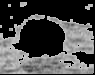

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/gray_S_B.png")

# Convert input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Perform morphological closing to fill small holes in white regions
kernel_size = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Invert binary image to obtain background mask
mask = cv2.bitwise_not(closed)

# Apply background mask to input image
result = cv2.bitwise_and(img, img, mask=mask)

# Show the inverted image
cv2_imshow(result)

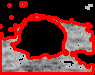

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/mor_B.png")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours of binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a threshold on the distance from the center of each contour to the center of the image
threshold = 50

# Loop over all contours
for contour in contours:
    # Compute the center of the contour using moments
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Compute the distance from the center of the contour to the center of the image
        dist = np.sqrt((cx - img.shape[1]//2)**2 + (cy - img.shape[0]//2)**2)
        # Check if the contour is centered on the black point
        if dist < threshold:
            # Draw the contour on the original image
            cv2.drawContours(img, [contour], 0, (0, 0, 255), 2)

# Save output image
cv2.imwrite('output_image.jpg', img)

# Show the inverted image
cv2_imshow(img)

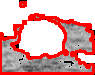

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/contour_B.png")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to obtain binary image with black background and white foreground
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)

# Perform morphological closing operation with a square kernel of size 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Perform morphological opening operation with a square kernel of size 5x5
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

# Invert the image to obtain black foreground and white background
filled = 255 - opened

# Create a white mask with the same size as the input image
mask = np.ones_like(img, np.uint8) * 255

# Copy the filled image to the mask using the filled image as a mask
mask[filled == 255] = img[filled == 255]

# Save output image
cv2.imwrite('output_image.jpg', mask)


# Show the inverted image
cv2_imshow(mask)


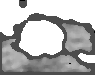

In [ ]:
import cv2

# Load image
img = cv2.imread("/content/drive/MyDrive/Breast/inner_white_B.png", cv2.IMREAD_GRAYSCALE)

# Apply median filter
img_filtered = cv2.medianBlur(img, 5)

# Display result
cv2_imshow(img_filtered)


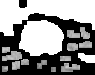

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/inner_white_B.png")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain binary image with black background and white foreground
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

# Perform morphological closing operation with a rectangular kernel of size 5x5 to remove small holes in the foreground
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Invert the image to obtain white background and black foreground
inverted = 255 - closed

# Create a black mask with the same size as the input image
mask = np.zeros_like(img, np.uint8)

# Copy the input image to the mask using the inverted image as a mask
mask[inverted == 255] = img[inverted == 255]

# Save output image
cv2.imwrite('output_image.jpg', mask)


# Show the inverted image
cv2_imshow(mask)

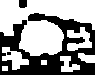

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/greybox_B.png")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological closing operation with a rectangular kernel to fill any gaps or holes in the shape
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Perform morphological opening operation with a smaller rectangular kernel to remove small white spaces
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel2)

# Invert the image
inverted = cv2.bitwise_not(opened)

# Save the output image
cv2.imwrite('output_image.jpg', inverted)


# Show the inverted image
cv2_imshow(inverted)

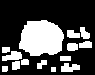

In [ ]:
import cv2

# Load the image
img = cv2.imread("/content/drive/MyDrive/Breast/background_black_B.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour, which should correspond to the large white shape
max_area = 0
largest_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

# Create a black mask image of the same size as the original image
mask = np.zeros_like(img)

# Draw the largest contour in white on the black mask image
cv2.drawContours(mask, [largest_contour], 0, (255, 255, 255), -1)

# Use the bitwise AND operator to apply the mask to the original image
result = cv2.bitwise_and(img, mask)

# Display the result
cv2_imshow(result)


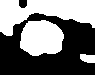

In [ ]:
import cv2
import numpy as np

# Load input image
img = cv2.imread("/content/drive/MyDrive/Breast/median_B.png")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological closing operation with a rectangular kernel to fill any gaps or holes in the shape
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Perform morphological opening operation with a smaller rectangular kernel to remove small white spaces
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel2)

# Invert the image
inverted = cv2.bitwise_not(opened)

# Save the output image
cv2.imwrite('output_image.jpg', inverted)


# Show the inverted image
cv2_imshow(inverted)

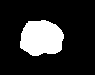

In [ ]:
import cv2

# Load the image
img = cv2.imread("/content/drive/MyDrive/Breast/bitwise_B.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour, which should correspond to the large white shape
max_area = 0
largest_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

# Create a black mask image of the same size as the original image
mask = np.zeros_like(img)

# Draw the largest contour in white on the black mask image
cv2.drawContours(mask, [largest_contour], 0, (255, 255, 255), -1)

# Use the bitwise AND operator to apply the mask to the original image
result = cv2.bitwise_and(img, mask)

# Display the result
cv2_imshow(result)
